<a href="https://colab.research.google.com/github/Nithya153/devops/blob/main/flight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Flight price prediction

##FLOW CHART



1. Importing libraries
2. Importing datasets
3. Preprocessing
4. Identifying and handling missing values
5. Visualization
6. Encoding categorical features to numerical
7. Splitting the data and Scaling
8. Model building


In [1]:
import pandas as pd
import numpy as np

In [2]:
file1 = pd.read_csv('/content/business.csv')
file1.head(5)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [3]:
file2 = pd.read_csv('/content/economy.csv')
file2.head(5)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [4]:
#adding  the new feature named class
file1["class"] = "business"
file2["class"] = "economy"

In [5]:
df = pd.merge(file1,file2,how='outer',)

In [6]:
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",business
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",business
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",business
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450",business
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690",business


In [7]:
df.isna().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
class         0
dtype: int64

In [8]:
#merging two columns (ch_code and "num_code") and making new feature flight
df.num_code = df.num_code.astype("str")
df["flight"] = df["ch_code"] +"-"+ df["num_code"]

In [9]:
df = df.drop(['ch_code', 'num_code'],axis=1)

In [10]:
df

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,class,flight
0,11-02-2022,Air India,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",business,AI-868
1,11-02-2022,Air India,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",business,AI-624
2,11-02-2022,Air India,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",business,AI-531
3,11-02-2022,Air India,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450",business,AI-839
4,11-02-2022,Air India,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690",business,AI-544
...,...,...,...,...,...,...,...,...,...,...,...
300256,31-03-2022,Vistara,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,697",economy,UK-832
300257,31-03-2022,Vistara,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,709",economy,UK-832
300258,31-03-2022,Vistara,12:30,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640",economy,UK-826
300259,31-03-2022,Vistara,09:45,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640",economy,UK-822


In [11]:
df.isna().sum()

date          0
airline       0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
class         0
flight        0
dtype: int64

In [12]:
dd = pd.DataFrame(df["date"].str.split("-",expand = True).to_numpy().astype(int),columns = ["day","month","year"])

In [13]:
df["days_left"] = np.where(dd["month"] > 2, dd["day"] +18, np.where(dd["month"] == 2, dd["day"] -10, dd["day"]))
df.head()

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,class,flight,days_left
0,11-02-2022,Air India,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",business,AI-868,1
1,11-02-2022,Air India,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",business,AI-624,1
2,11-02-2022,Air India,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",business,AI-531,1
3,11-02-2022,Air India,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450",business,AI-839,1
4,11-02-2022,Air India,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690",business,AI-544,1


In [14]:
dd = pd.concat([df,dd])

In [15]:
dd.drop("date",axis = 1,inplace = True)

In [16]:
dd.head()

,airline,dep_time,from,time_taken,stop,arr_time,to,price,class,flight,days_left,day,month,year
0,Air India,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",business,AI-868,1.0,NaN,NaN,NaN
1,Air India,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",business,AI-624,1.0,NaN,NaN,NaN
2,Air India,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",business,AI-531,1.0,NaN,NaN,NaN
3,Air India,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450",business,AI-839,1.0,NaN,NaN,NaN
4,Air India,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690",business,AI-544,1.0,NaN,NaN,NaN


In [17]:
df

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,class,flight,days_left
0,11-02-2022,Air India,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",business,AI-868,1
1,11-02-2022,Air India,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",business,AI-624,1
2,11-02-2022,Air India,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",business,AI-531,1
3,11-02-2022,Air India,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450",business,AI-839,1
4,11-02-2022,Air India,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690",business,AI-544,1
...,...,...,...,...,...,...,...,...,...,...,...,...
300256,31-03-2022,Vistara,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,697",economy,UK-832,49
300257,31-03-2022,Vistara,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,709",economy,UK-832,49
300258,31-03-2022,Vistara,12:30,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640",economy,UK-826,49
300259,31-03-2022,Vistara,09:45,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640",economy,UK-822,49


In [18]:
import re
# making the stop in numeric data type by giving stop accordingly
df["stop"] = df["stop"].apply(lambda r: re.sub("[^0-9]","",r))
# taking only digits
df["stop"] = np.where(df["stop"] == "", 0, df["stop"]) 
# replacing "" with 0
df["stop"] = df["stop"].astype(int)
# changing object to int
df.head()

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,class,flight,days_left
0,11-02-2022,Air India,18:00,Delhi,02h 00m,0,20:00,Mumbai,"25,612",business,AI-868,1
1,11-02-2022,Air India,19:00,Delhi,02h 15m,0,21:15,Mumbai,"25,612",business,AI-624,1
2,11-02-2022,Air India,20:00,Delhi,24h 45m,1,20:45,Mumbai,"42,220",business,AI-531,1
3,11-02-2022,Air India,21:25,Delhi,26h 30m,1,23:55,Mumbai,"44,450",business,AI-839,1
4,11-02-2022,Air India,17:15,Delhi,06h 40m,1,23:55,Mumbai,"46,690",business,AI-544,1


In [19]:
# removing noise from price column
df["price"] = df["price"].apply(lambda r: re.sub("[^0-9]","",r)) # taking only digits
df["price"] = df["price"].astype(int) # changing object to int
df.head()

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,class,flight,days_left
0,11-02-2022,Air India,18:00,Delhi,02h 00m,0,20:00,Mumbai,25612,business,AI-868,1
1,11-02-2022,Air India,19:00,Delhi,02h 15m,0,21:15,Mumbai,25612,business,AI-624,1
2,11-02-2022,Air India,20:00,Delhi,24h 45m,1,20:45,Mumbai,42220,business,AI-531,1
3,11-02-2022,Air India,21:25,Delhi,26h 30m,1,23:55,Mumbai,44450,business,AI-839,1
4,11-02-2022,Air India,17:15,Delhi,06h 40m,1,23:55,Mumbai,46690,business,AI-544,1


In [20]:
# making time_taken in float values by calculating only hours
temp = pd.DataFrame(df["time_taken"].str.split(expand = True).to_numpy().astype(str), 
                    columns = ["hour","minute"])
temp["hour"] = temp["hour"].apply(lambda x: re.sub("[^0-9]","",x)).astype(int)
temp["minute"] = temp["minute"].apply(lambda r: re.sub("[^0-9]","",r)) # we have no values in minute colum some where 
temp["minute"] = np.where(temp["minute"] == "", 0, temp["minute"]) # replaceing "" with 0
temp["minute"] = temp["minute"].astype(int) #converting data type
df["time_taken"] = np.around((temp["hour"] + (temp["minute"]/60)),2) #savin the total hours in time_taken feature
df.head()

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,class,flight,days_left
0,11-02-2022,Air India,18:00,Delhi,2.00,0,20:00,Mumbai,25612,business,AI-868,1
1,11-02-2022,Air India,19:00,Delhi,2.25,0,21:15,Mumbai,25612,business,AI-624,1
2,11-02-2022,Air India,20:00,Delhi,24.75,1,20:45,Mumbai,42220,business,AI-531,1
3,11-02-2022,Air India,21:25,Delhi,26.50,1,23:55,Mumbai,44450,business,AI-839,1
4,11-02-2022,Air India,17:15,Delhi,6.67,1,23:55,Mumbai,46690,business,AI-544,1


In [21]:
df.corr()

,time_taken,stop,price,days_left
time_taken,1.000000,0.467931,0.204134,-0.039207
stop,0.467931,1.000000,0.119798,-0.008566
price,0.204134,0.119798,1.000000,-0.091917
days_left,-0.039207,-0.008566,-0.091917,1.000000


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

 1. color map ranges from yellow (low values) to green (medium values) to blue (high values)
2. color map for visualizing of continuous data

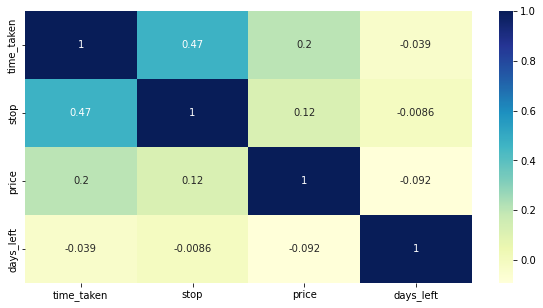

In [23]:
plt.figure(figsize = (10, 5))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

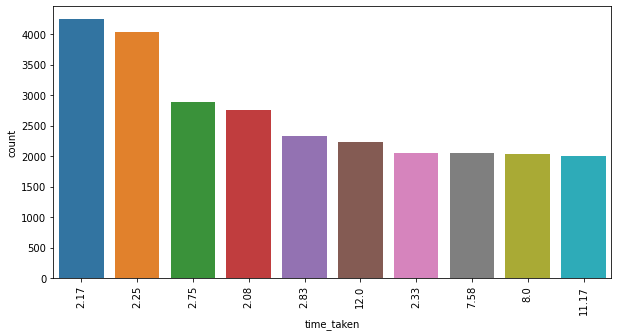

In [24]:
fig, ax = plt.subplots(figsize=(10,5))
ax.tick_params(axis='x', rotation=90)
y_count=sns.countplot(x='time_taken',data=df, ax = ax, order = df['time_taken'].value_counts().iloc[:10].index)

(2.17)am (early morning) flights will fly more times

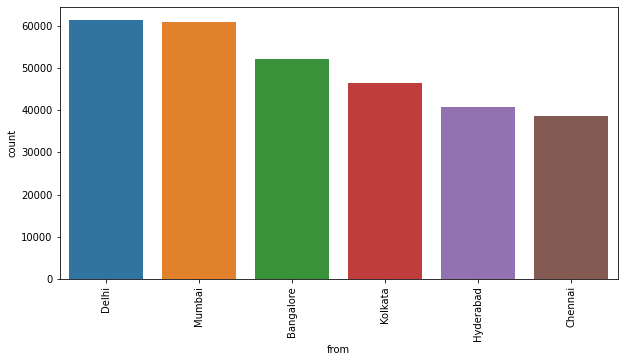

In [25]:
fig, ax = plt.subplots(figsize=(10,5))
ax.tick_params(axis='x', rotation=90)
y_count=sns.countplot(x='from',data=df, ax = ax, order = df['from'].value_counts().index)

From Delhi and Mumbai lot of flights were flied

In [26]:
df.head()

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,class,flight,days_left
0,11-02-2022,Air India,18:00,Delhi,2.00,0,20:00,Mumbai,25612,business,AI-868,1
1,11-02-2022,Air India,19:00,Delhi,2.25,0,21:15,Mumbai,25612,business,AI-624,1
2,11-02-2022,Air India,20:00,Delhi,24.75,1,20:45,Mumbai,42220,business,AI-531,1
3,11-02-2022,Air India,21:25,Delhi,26.50,1,23:55,Mumbai,44450,business,AI-839,1
4,11-02-2022,Air India,17:15,Delhi,6.67,1,23:55,Mumbai,46690,business,AI-544,1


In [27]:
df = df.drop(['flight'],axis=1)

In [28]:
df["class"].replace({"economy":0,"business":1},inplace=True)
df.head()

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,class,days_left
0,11-02-2022,Air India,18:00,Delhi,2.00,0,20:00,Mumbai,25612,1,1
1,11-02-2022,Air India,19:00,Delhi,2.25,0,21:15,Mumbai,25612,1,1
2,11-02-2022,Air India,20:00,Delhi,24.75,1,20:45,Mumbai,42220,1,1
3,11-02-2022,Air India,21:25,Delhi,26.50,1,23:55,Mumbai,44450,1,1
4,11-02-2022,Air India,17:15,Delhi,6.67,1,23:55,Mumbai,46690,1,1


In [29]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
df[list(df["airline"].unique())] = ohe.fit_transform(df[["airline"]]).A 
# making sparse metrics to metrics
df = pd.concat([df,pd.get_dummies(df["from"],prefix = "from")], axis = 1)
df = pd.concat([df,pd.get_dummies(df["to"],prefix = "to")], axis = 1)
df.drop(["airline","to","from"],axis = 1,inplace=True)
df.head()

,date,dep_time,time_taken,stop,arr_time,price,class,days_left,Air India,Vistara,...,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai
0,11-02-2022,18:00,2.00,0,20:00,25612,1,1,1.0,0.0,...,1,0,0,0,0,0,0,0,0,1
1,11-02-2022,19:00,2.25,0,21:15,25612,1,1,1.0,0.0,...,1,0,0,0,0,0,0,0,0,1
2,11-02-2022,20:00,24.75,1,20:45,42220,1,1,1.0,0.0,...,1,0,0,0,0,0,0,0,0,1
3,11-02-2022,21:25,26.50,1,23:55,44450,1,1,1.0,0.0,...,1,0,0,0,0,0,0,0,0,1
4,11-02-2022,17:15,6.67,1,23:55,46690,1,1,1.0,0.0,...,1,0,0,0,0,0,0,0,0,1


In [30]:
df = df.drop(["date"] , axis = 1)

In [31]:
df = df.drop(["dep_time","arr_time"] , axis = 1)

In [32]:
df

,time_taken,stop,price,class,days_left,Air India,Vistara,SpiceJet,AirAsia,GO FIRST,...,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai
0,2.00,0,25612,1,1,1.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
1,2.25,0,25612,1,1,1.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
2,24.75,1,42220,1,1,1.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
3,26.50,1,44450,1,1,1.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
4,6.67,1,46690,1,1,1.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300256,13.83,1,7697,0,49,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
300257,13.83,1,7709,0,49,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
300258,20.58,1,8640,0,49,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
300259,23.33,1,8640,0,49,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0


In [33]:
X = df.drop("price", axis = 1)
y = df["price"]

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [36]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test) 

In [37]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=10)

In [38]:
model = model.fit(X_train, y_train)

In [39]:
y_pred = model.predict(X_test)

In [40]:
from sklearn import metrics
print('Ridge_Regression')
print('r2_score', "{:.2f}".format(metrics.r2_score(y_test,y_pred)*100))
score = metrics.r2_score(y_test,y_pred)
a_r2 = 1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted_r2_score',"{:.2f}".format(a_r2*100))
print('MAE:', "{:.2f}".format(metrics.mean_absolute_error(y_test, y_pred)))
#print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', "{:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Ridge_Regression
r2_score 90.84
Adjusted_r2_score 90.84
MAE: 4535.34
RMSE: 6865.61


In [41]:
class RidgeRegression() :
      
    def __init__( self, learning_rate, iterations, l2_penality ) :
          
        self.learning_rate = learning_rate        
        self.iterations = iterations        
        self.l2_penality = l2_penality
          
    # Function for model training            
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape
          
        # weight initialization        
        self.W = np.zeros( self.n )
          
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :           
        Y_pred = self.predict( self.X )
          
        # calculate gradients      
        dW = ( - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) +               
               ( 2 * self.l2_penality * self.W ) ) / self.m     
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db        
        return self
      
    # Hypothetical function  h( x ) 
    def predict( self, X ) :    
        return X.dot( self.W ) + self.b
      
# Driver code
  
def main() :
      
    
    # Model training    
    model = RidgeRegression( iterations = 1000,                             
                            learning_rate = 0.01, l2_penality = 0.01 )
    model.fit( X_train, y_train )
      
    # Prediction on test set
    Y_pred = model.predict( X_test )    

      
   
      
if __name__ == "__main__" : 
    main()

In [42]:
model = RidgeRegression( iterations = 1000,                             
                            learning_rate = 0.1, l2_penality = 0.01)
model.fit( X_train, y_train )

In [43]:
Y_pred = model.predict( X_test )

In [44]:
r2 = 1 - np.sum((y_test - Y_pred)**2) / np.sum((y_test -np.mean(y_test))**2)
mae = np.sum(np.abs(y_test - Y_pred))/len(y_test)


print("R-squared:", r2*100)
print("MAE:", mae)

R-squared: 90.84174552722058
MAE: 4535.348776041697


In [45]:
def main() :  
      
    # Model training    
    max_accuracy = 0
      
    # learning_rate choices    
    learning_rates = [ 0.1, 0.2, 0.3, 0.4, 0.5, 
                      0.01, 0.02, 0.03, 0.04, 0.05]
      
    # iterations choices    
    iterations = [ 100, 200, 300, 400, 500 ]

    #l2 penalty
    l2_penality = [0.1,1,10,100,0.01,0.001]
    
      
    # available combination of learning_rate and iterations
      
    parameters = []    
    for i in learning_rates :        
        for j in iterations :
          for l in l2_penality :         
            parameters.append( ( i, j, l ) )
              
    #print("Available combinations : ",  parameters )
              
    # Applying linear searching in list of available combination
    # to achieved maximum accuracy on CV set
      
    for k in range( len( parameters ) ) :        
        model = RidgeRegression( learning_rate = parameters[k][0], 
                                iterations = parameters[k][1], l2_penality = parameters[k][2] )
      
        model.fit( X_train, y_train )
        
        # Prediction on validation set
        Y_pred = model.predict( X_test )
       

              
        # counter    
        count = 0
      
    mse = np.mean((Y_pred - y_test)**2)
    r2 = 1 - np.sum((y_test - Y_pred)**2) / np.sum((y_test -np.mean(y_test))**2)
    mae = np.sum(np.abs(y_test - Y_pred))/len(y_test)


              
    print("MSE:", mse)
    print("R-squared:", r2*100) 
    print("MAE:", mae)

if __name__ == "__main__" :     
    main()

MSE: 47136596.869571984
R-squared: 90.84174552690851
MAE: 4535.348781325748
